In [213]:
import tensorflow as tf
import tensorflow.keras as keras

In [214]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Reshape, BatchNormalization, ReLU, Conv2DTranspose
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
import numpy as np

In [215]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [216]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

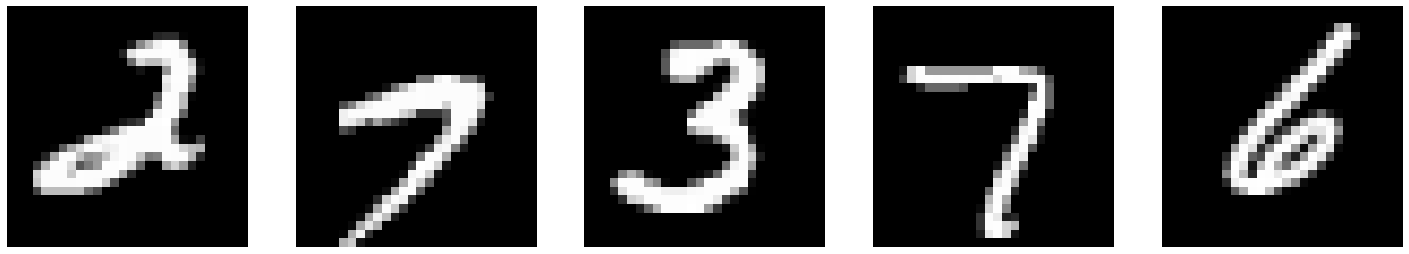

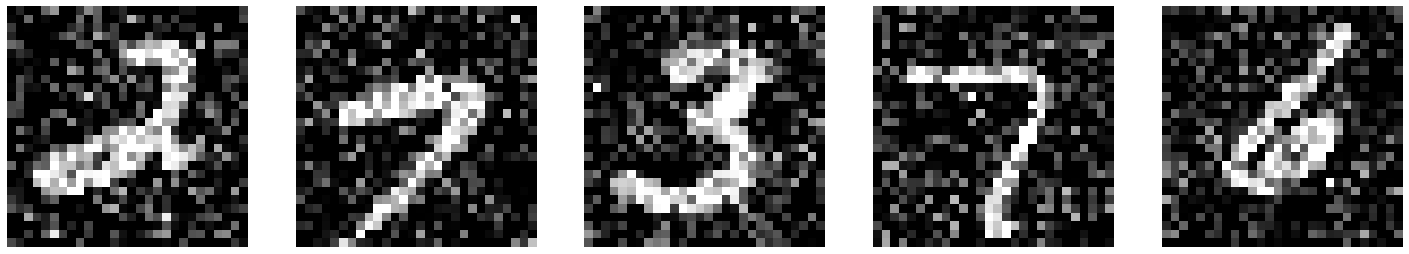

In [219]:
# create some noise in random dist 
# create random with mu .5 & sigma .5 into 0,1
# or for simple training with mu .3 & sigma .3 into (0, .6)
noise_train = np.random.normal(loc=.0, scale=.3, size=x_train.shape)
noise_test = np.random.normal(loc=.0, scale=.3, size=x_test.shape)
# add noise into original images
train_noisy = np.clip(x_train + noise_train, 0, 1)
test_noisy = np.clip(x_test + noise_test, 0, 1)


# show original img
indexs = np.random.randint(1, 1000, 5)
fig, axis = plt.subplots(1, 5, figsize=(25, 8))
for i, ax in zip(indexs, axis.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

# show noisy img
fig, axis = plt.subplots(1, 5, figsize=(25, 8))
for i, ax in zip(indexs, axis.flat):
    ax.imshow(train_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

In [221]:
encoder = Sequential([
    Conv2D(32, 3, (1, 1), padding='same'),
    BatchNormalization(),
    ReLU(),
    Conv2D(16, 3, (2, 2), padding='same'),
    BatchNormalization(),
    ReLU(),
    Conv2D(8, 3, (2, 2), padding='same'),
    BatchNormalization(),
    ReLU(),])

decoder = Sequential([
    Conv2DTranspose(16, 3, (2, 2), padding='same'),
    BatchNormalization(),
    ReLU(),
    Conv2DTranspose(32, 3, (2, 2), padding='same'),
    BatchNormalization(),
    ReLU(),
    Conv2DTranspose(1, 3, (1, 1), padding='same', activation='sigmoid'),
])

# summary
img = Input(shape = (28, 28, 1))
model = Model(inputs = img, outputs = decoder(encoder(img)))
model.summary()

Model: "functional_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_81 (Sequential)   (None, 7, 7, 8)           6328      
_________________________________________________________________
sequential_82 (Sequential)   (None, 28, 28, 1)         6289      
Total params: 12,617
Trainable params: 12,409
Non-trainable params: 208
_________________________________________________________________


In [222]:
model.compile(keras.optimizers.Adam(lr=0.003), loss = keras.losses.binary_crossentropy)
H = model.fit(train_noisy, x_train, validation_split=.1, batch_size=16, epochs=5, verbose=1)

Epoch 1/5
3375/3375 [==============================] - 20s 6ms/step - loss: 0.0816 - val_loss: 0.0781
Epoch 2/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0775 - val_loss: 0.0769
Epoch 3/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0768 - val_loss: 0.0768
Epoch 4/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0763 - val_loss: 0.0766
Epoch 5/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0761 - val_loss: 0.0765


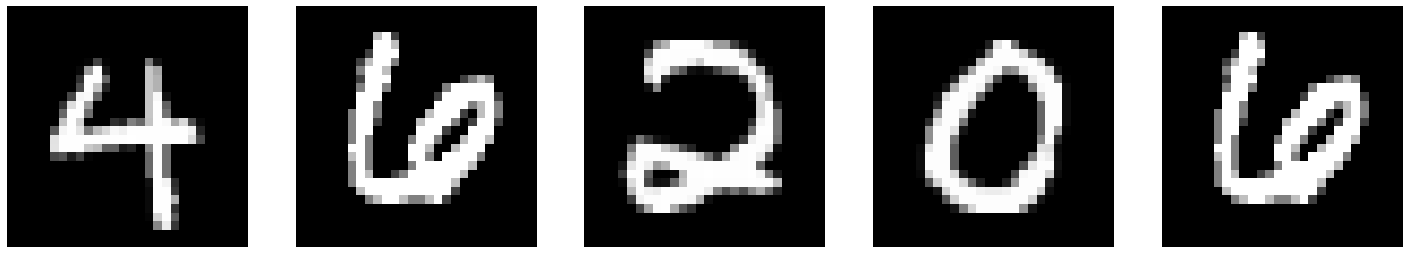

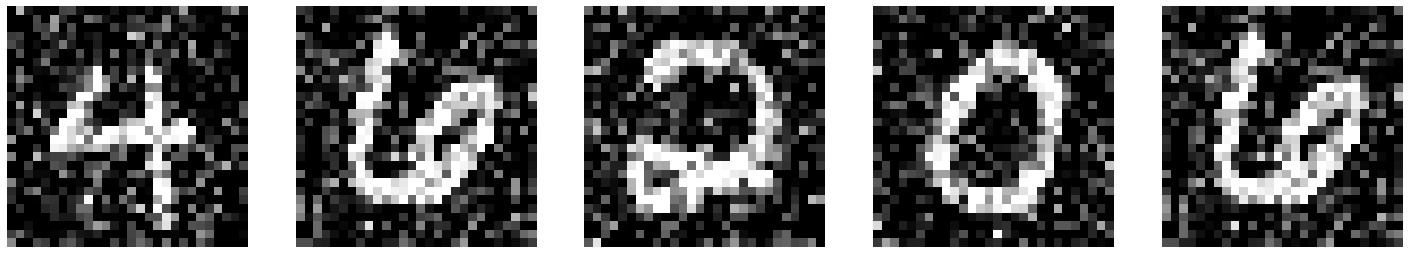

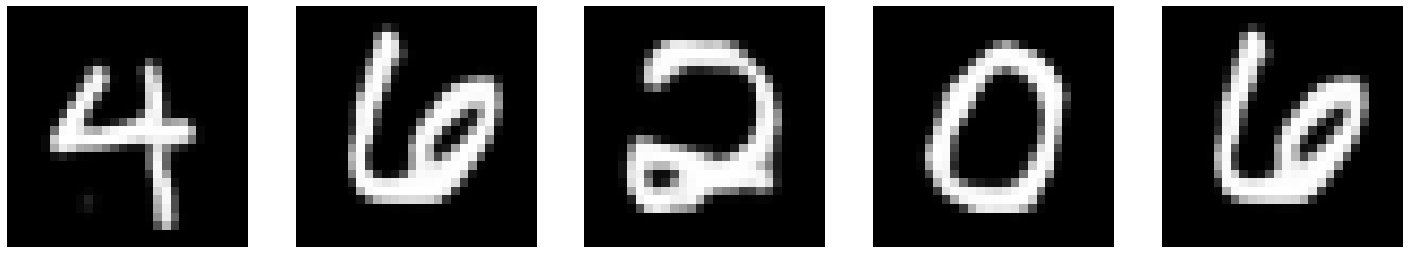

In [224]:
# original data
indexs = np.random.randint(1, 1000, 5)
fig, axis = plt.subplots(1, 5, figsize=(25, 8))
for i, ax in zip(indexs, axis.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

# noisy data
fig, axis = plt.subplots(1, 5, figsize=(25, 8))
for i, ax in zip(indexs, axis.flat):
    ax.imshow(test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

# denoising data
X = model.predict(test_noisy[indexs])
fig, axis = plt.subplots(1, 5, figsize=(25, 8))
for i, ax in zip(range(0, 5), axis.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')